In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    gray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    
    #kp, des = sift.detectAndCompute(gray,None)
    kp = sift.detect(gray,None)

    img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #img=cv2.drawKeypoints(gray,kp)

    cv2.imshow('dst',img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img2 = cv2.imread('./SIFT/Pen.jpg',0) # trainImage

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(frame,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(frame,kp1,img2,kp2,good,None,flags=2)

    cv2.imshow('dst',img3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

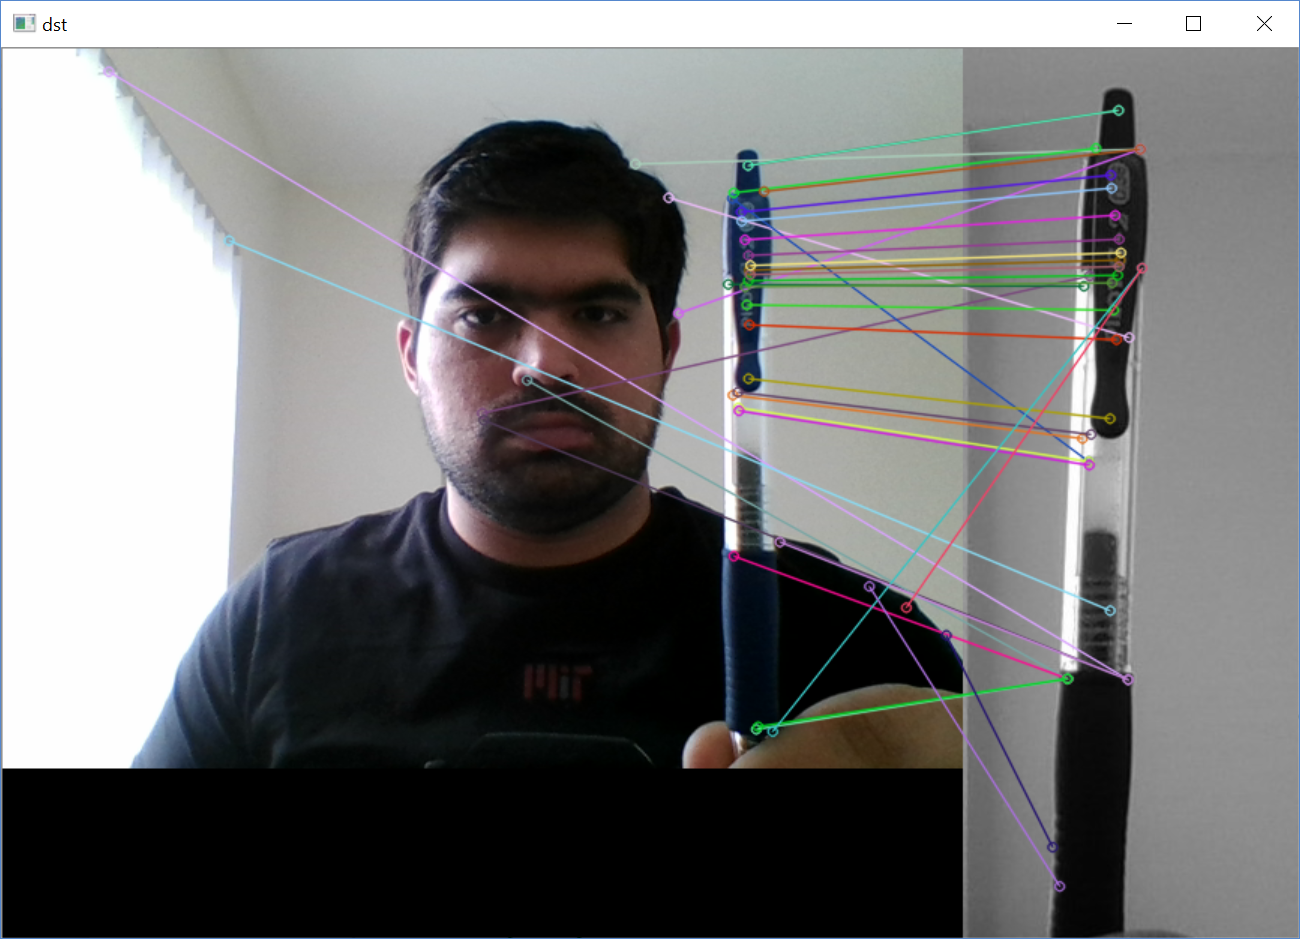

In [2]:
from IPython.display import Image
Image(filename='./SIFT/output.png', width=900)